In [46]:
#最初のセルにはモジュールのインポートを詰め込む
%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import jit
import time

In [47]:
#二個目のセルは定数とかの詰め合わせ
F = 8.0
K = 40
sample = 10000

In [48]:
#３つ目以降は関数
@jit
def df(X):
    nextX = np.empty(K)
    for j in range(K):
        if j == 0:
            nextX[j] = (X[j+1] - X[38])*X[39] - X[j] + F
        elif j == 1:
            nextX[j] = (X[j+1] - X[39])*X[j-1] - X[j] + F
        elif j == 39:
            nextX[j] = (X[0] - X[j-2])*X[j-1] - X[j] + F
        else:
            nextX[j] = (X[j+1] - X[j-2])*X[j-1] - X[j] + F
    return nextX

In [49]:
#dfについて4次ルンゲクッタ法をする関数
#tpoints = np.arange(tstart, tend, dt)
#Xは初期化した配列，この配列をRungeKutta4thに入れる．
#回す回数はサンプル分．

def Runge4(tpoints, X, Xr4):
    k = np.empty(K)
    k1 = np.empty(K)
    k2 = np.empty(K)
    k3 = np.empty(K)
    k4 = np.empty(K)
    Xtmp1 = np.empty(K)
    Xtmp2 = np.empty(K)
    Xtmp3 = np.empty(K)
    n = 0
    for t in tpoints:
        if(n == sample):
            break
        k1 = dt*df(X)
        Xtmp1 = X + k1*0.5
        k2 = dt*df(Xtmp1)
        Xtmp2 = X + k2*0.5
        k3 = dt*df(Xtmp2)
        Xtmp3 = X + k3
        k4 = dt*df(Xtmp3)
        k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
        Xr4[n] = X
        X = X + k
        n = n+1

In [50]:
#dfについての2次ルンゲクッタ法を適応する関数
def Runge2(tpoints, X, Xr2):
    k = np.empty(K)
    k1 = np.empty(K)
    k2 = np.empty(K)
    Xtmp1 = np.empty(K)
    n = 0
    for t in tpoints:
        if(n == sample):
            break
        k1 = dt*df(X)
        Xtmp1 = X + k1*0.5
        k2 = dt*df(Xtmp1)
        k = (k1 + k2)*0.5
        Xr2[n] = X
        X = X + k
        n = n+1

In [51]:
#dfについての2次ルンゲクッタ法を適応する関数
def Eular(tpoints, X, Xe2):
    k = np.empty(K)
    k1 = np.empty(K)
    k2 = np.empty(K)
    Xtmp1 = np.empty(K)
    n = 0
    for t in tpoints:
        if(n == sample):
            break
        Xe[n] = X
        k = dt*df(X)
        X = X + k
        n = n +1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/Users/tsuchiyaken/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


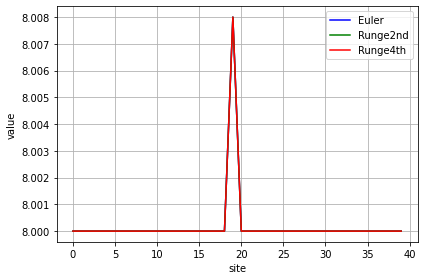

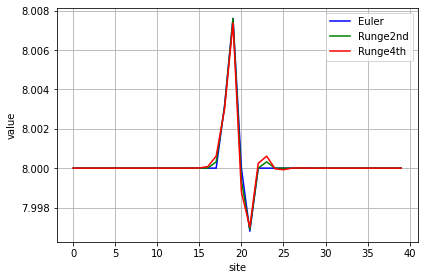

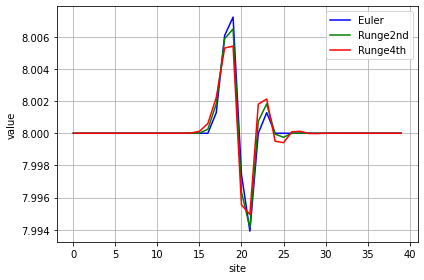

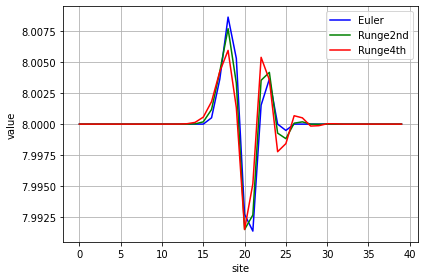

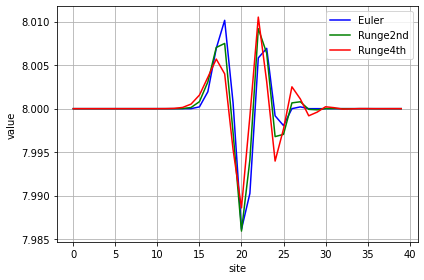

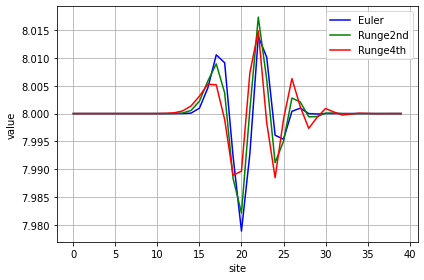

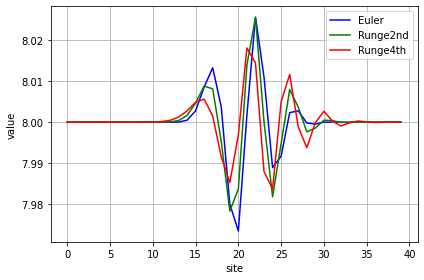

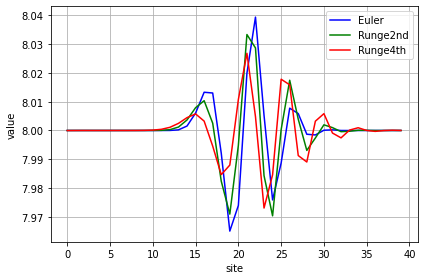

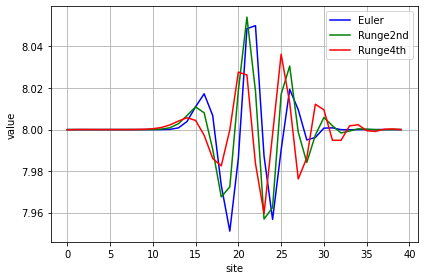

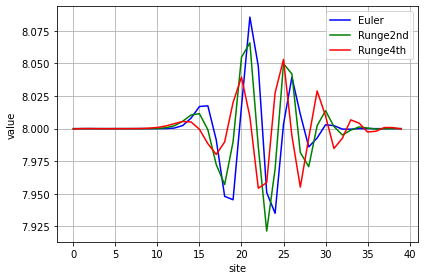

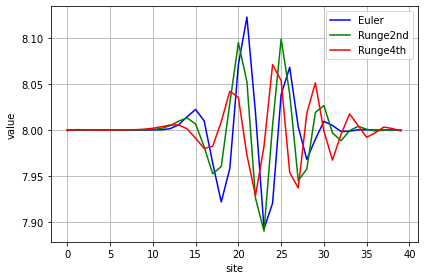

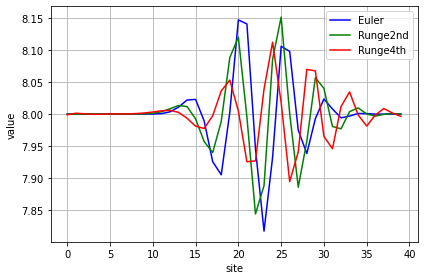

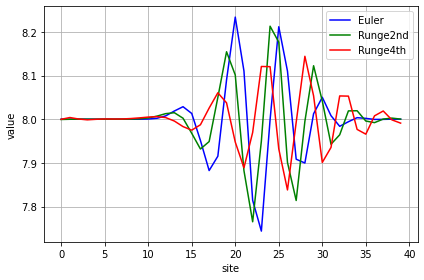

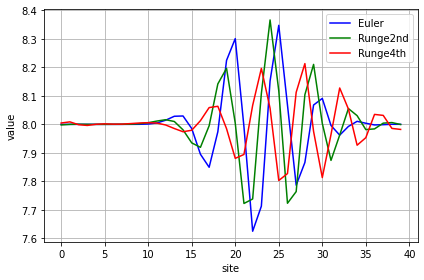

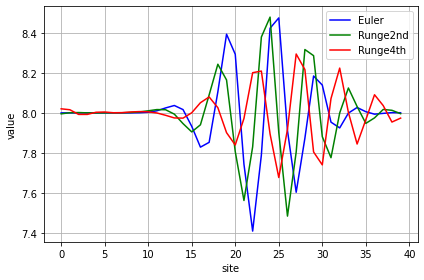

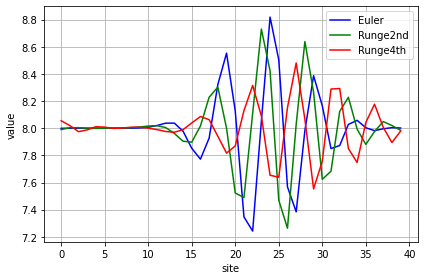

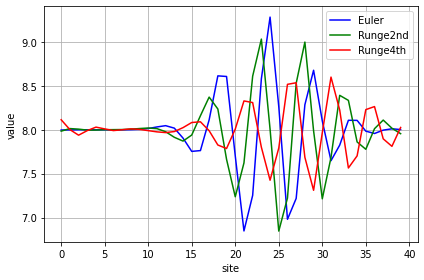

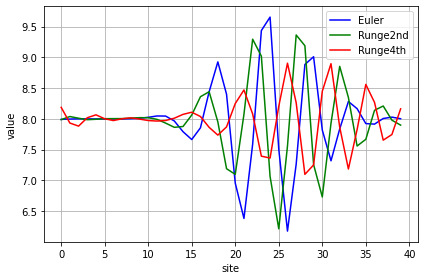

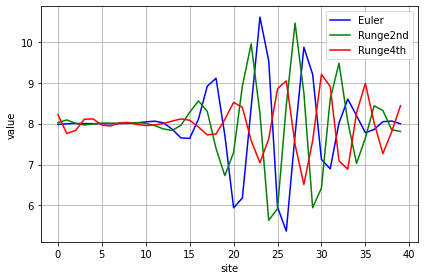

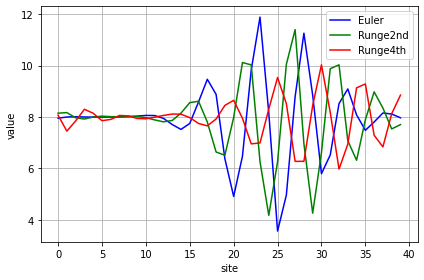

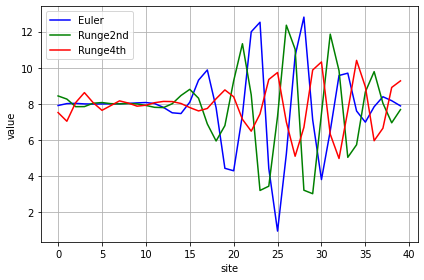

In [52]:
#3つの手法をdt = 0.05として比較する．
sample = 21


X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)
Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, K, 1)


for n in range(sample):
    
    print(n)
    fig, ax = plt.subplots()
    c1, c2, c3 = "blue", "green", "red"
    l1, l2, l3 = "Runge4th", "Runge2nd", "Euler"
    ax.set_xlabel('site')
    ax.set_ylabel('value')
    ax.grid()
    ax.plot(x, Xe[n], color=c1, label=l3)
    ax.plot(x, Xr2[n], color=c2, label=l2)
    ax.plot(x, Xr4[n], color=c3, label=l1)
    ax.legend(loc=0)
    fig.tight_layout()


/Users/tsuchiyaken/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


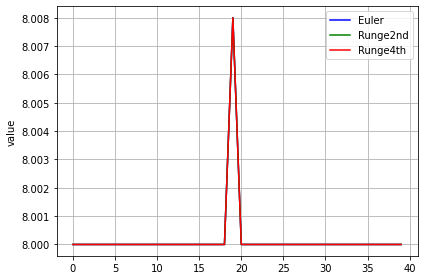

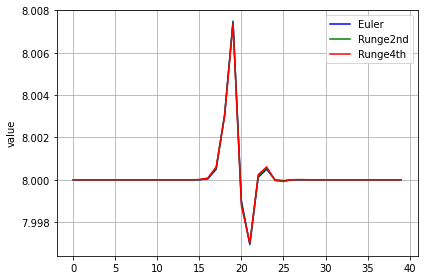

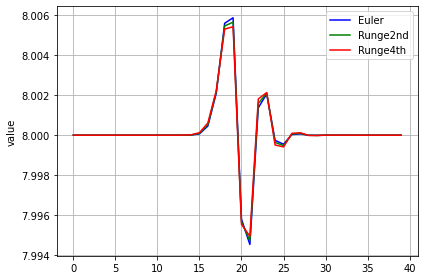

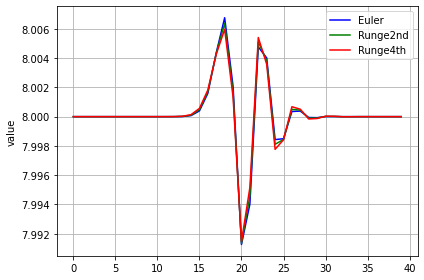

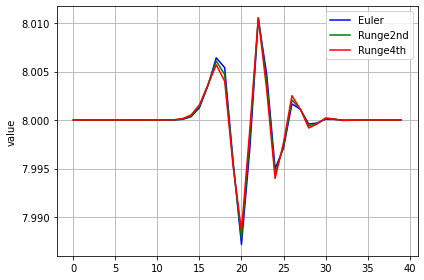

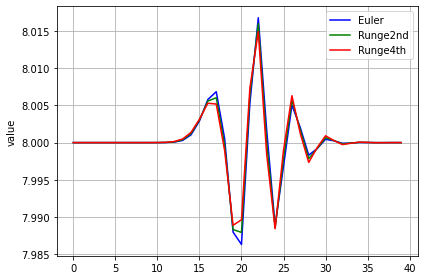

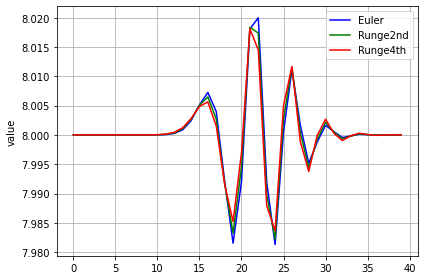

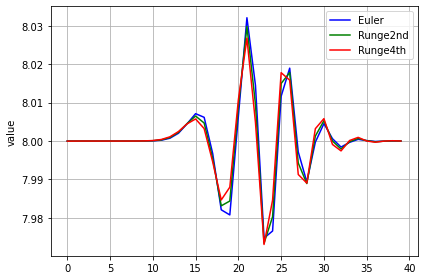

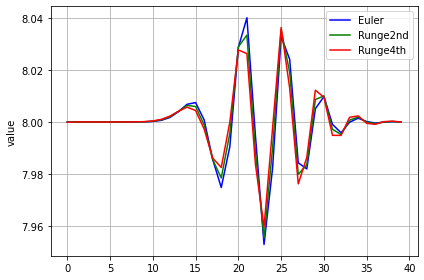

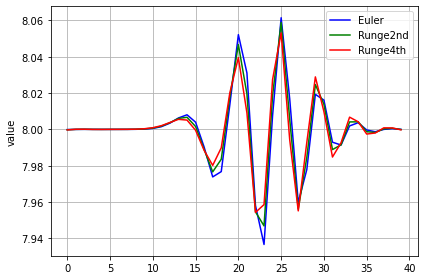

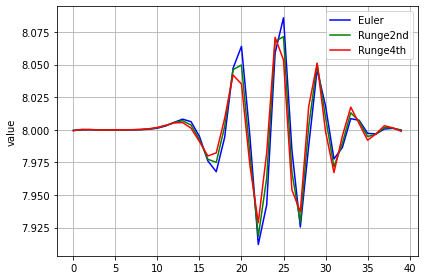

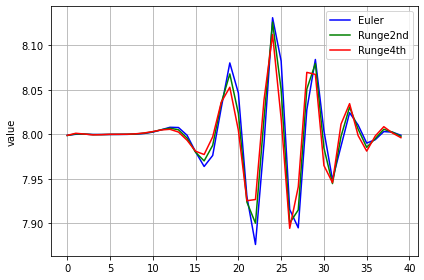

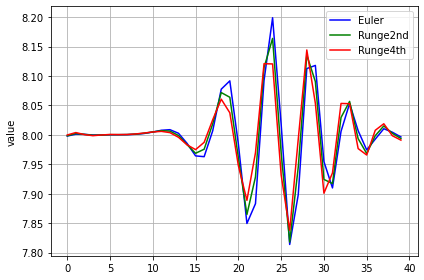

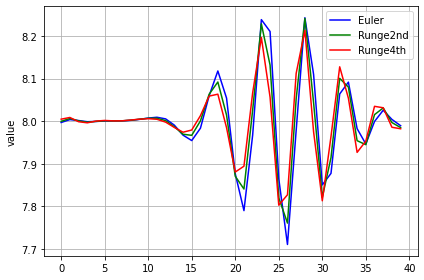

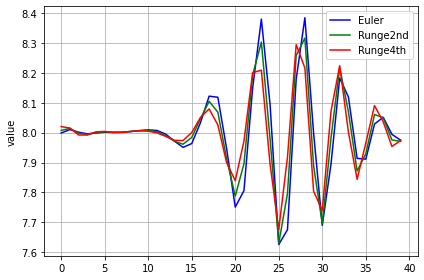

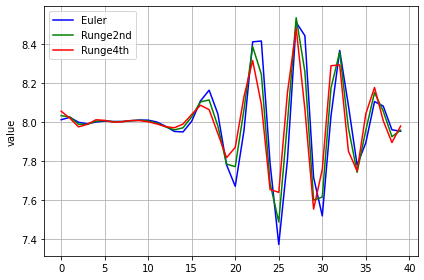

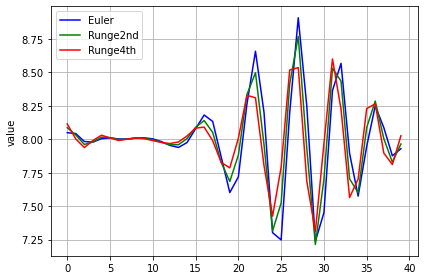

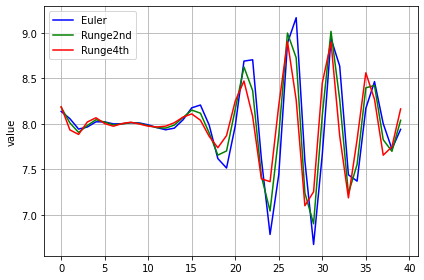

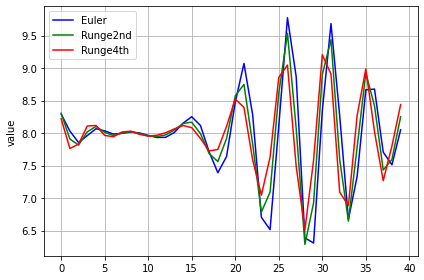

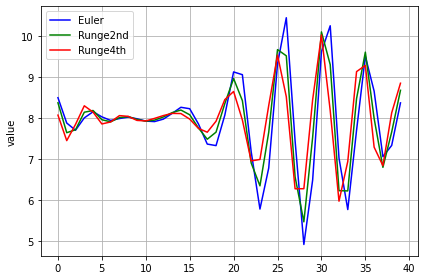

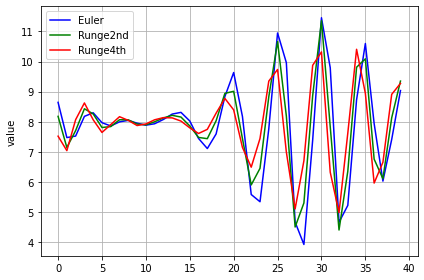

In [53]:
#3つの手法をRunge-Kutta4次のみdt = 0.05とし,
#他の二手法をdt = 0.01として比較する．
sample = 10000

X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)

tstart = 0.0
tend = sample*0.05
dt = 0.01
tpoints = np.arange(tstart, tend, dt)



Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, K, 1)


for n in range(105):
    
    if(n % 5 == 0):
        nR4 = int(n/5)
#         print("n = " + str(n))
#         print("nR4 = " + str(int(nR4)))
        fig, ax = plt.subplots()
        c1, c2, c3 = "blue", "green", "red"
        l1, l2, l3 = "Runge4th", "Runge2nd", "Euler"
        ax.set_ylabel('value')
        ax.grid()
        ax.plot(x, Xe[n], color=c1, label=l3)
        ax.plot(x, Xr2[n], color=c2, label=l2)
        ax.plot(x, Xr4[int(nR4)], color=c3, label=l1)
        ax.legend(loc=0)
        fig.tight_layout()


#         plt.figure(figsize=(8, 1))
#         plt.xlabel("points")
#         plt.ylabel("value")
#         plt.grid(True)
#         plt.plot(x, Xr4[nR4])
#         plt.show()

/Users/tsuchiyaken/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


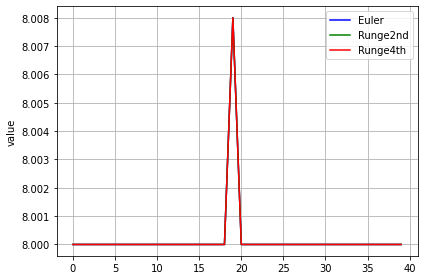

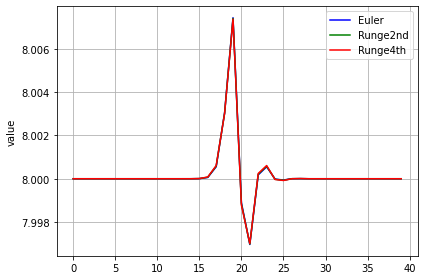

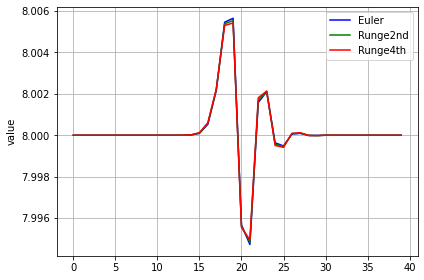

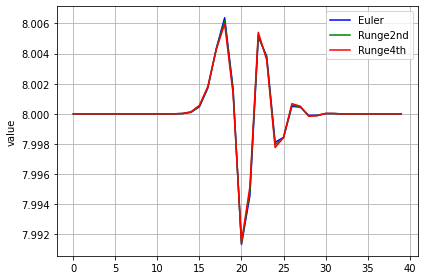

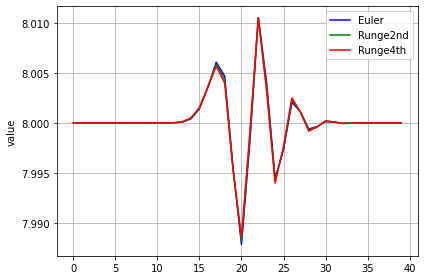

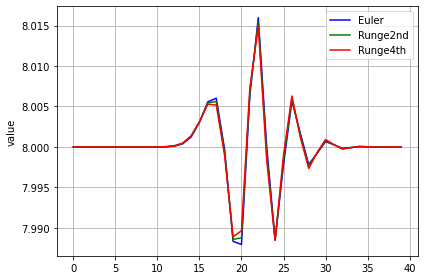

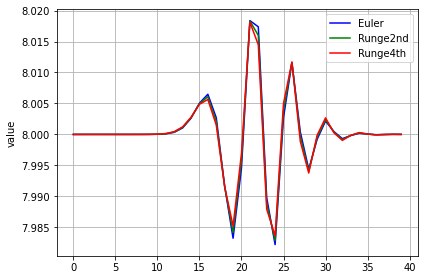

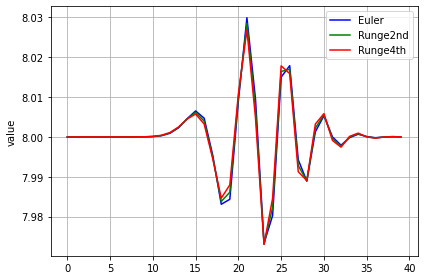

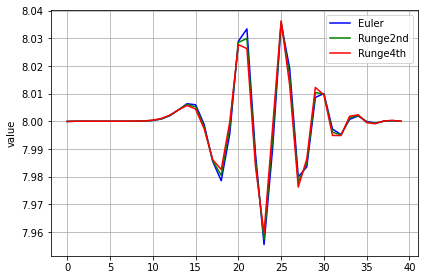

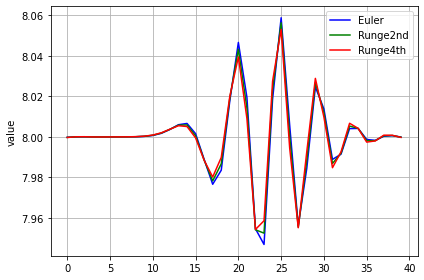

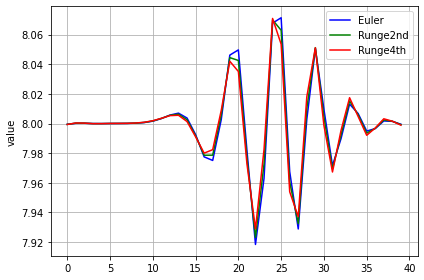

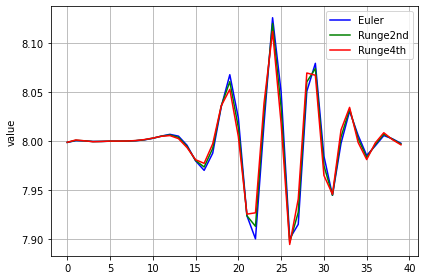

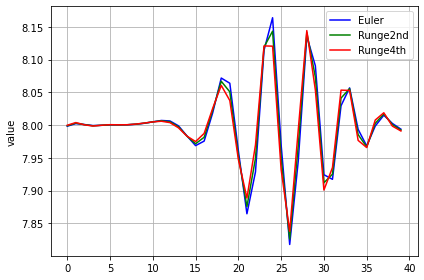

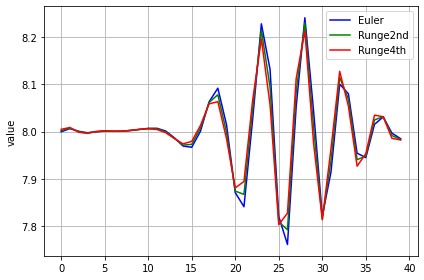

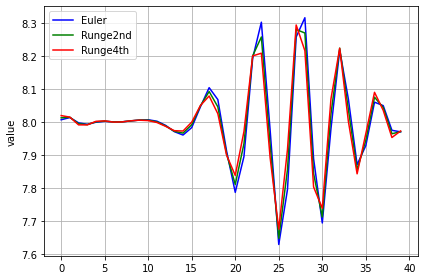

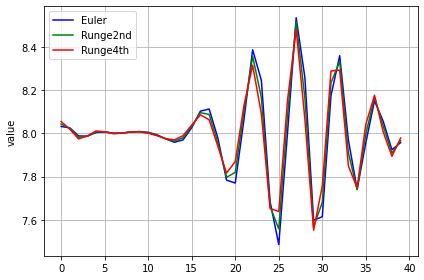

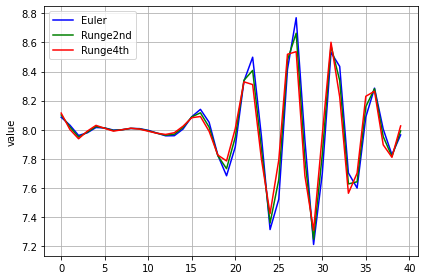

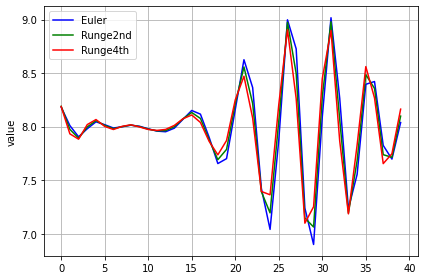

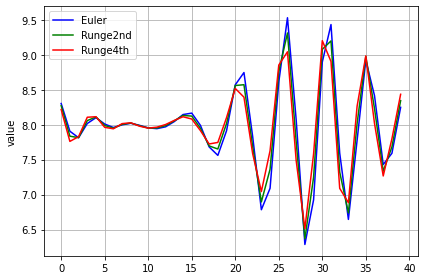

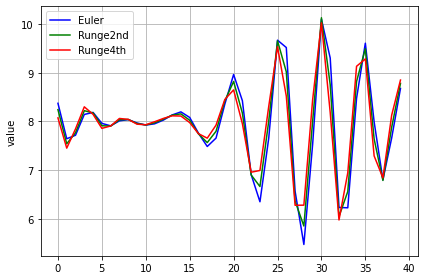

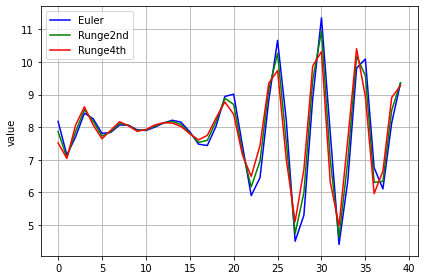

In [54]:
#3つの手法をRunge-Kutta4次のみdt = 0.05とし,
#他の二手法をdt = 0.005として比較する．
sample = 10000


X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)

tstart = 0.0
tend = sample*0.05
dt = 0.005
tpoints = np.arange(tstart, tend, dt)



Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, K, 1)


for n in range(210):
    
    if(n % 10 == 0):
        nR4 = int(n/10)
        fig, ax = plt.subplots()
        c1, c2, c3 = "blue", "green", "red"
        l1, l2, l3 = "Runge4th", "Runge2nd", "Euler"
        ax.set_ylabel('value')
        ax.grid()
        ax.plot(x, Xe[n], color=c1, label=l3)
        ax.plot(x, Xr2[n], color=c2, label=l2)
        ax.plot(x, Xr4[int(nR4)], color=c3, label=l1)
        ax.legend(loc=0)
        fig.tight_layout()



/Users/tsuchiyaken/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


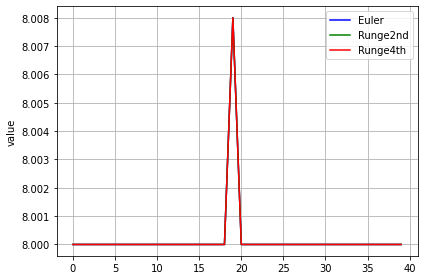

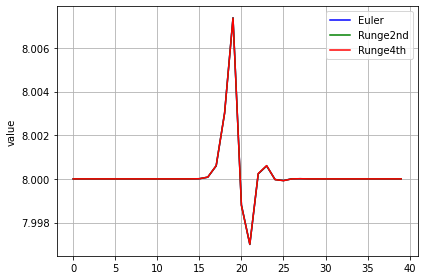

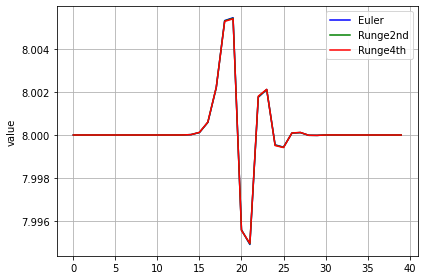

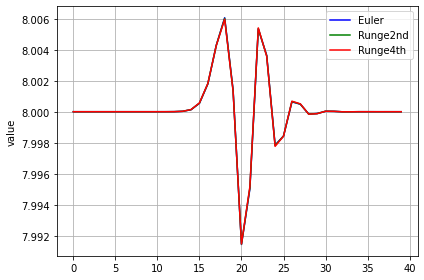

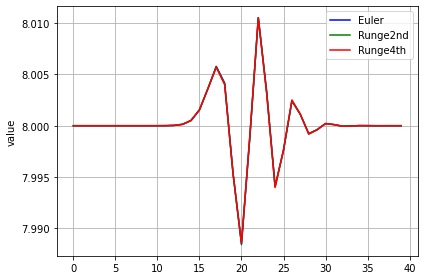

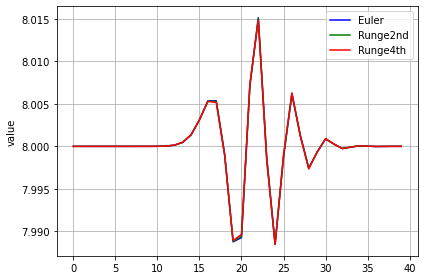

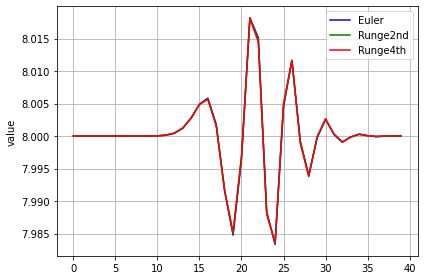

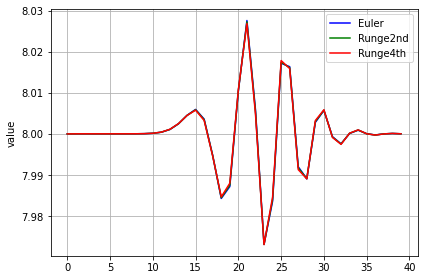

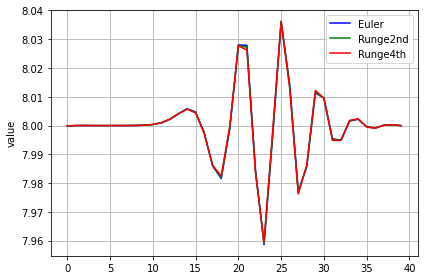

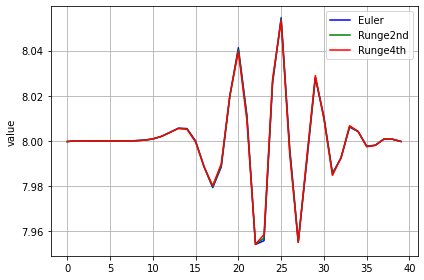

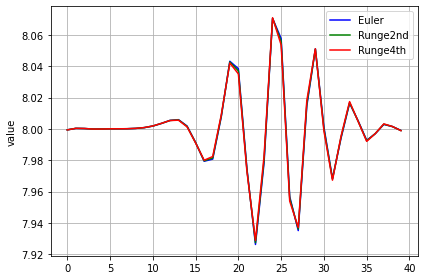

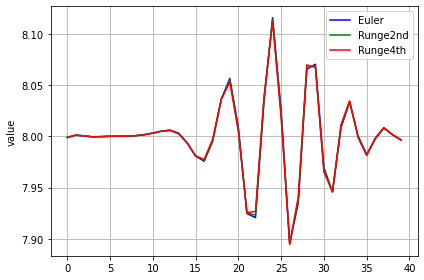

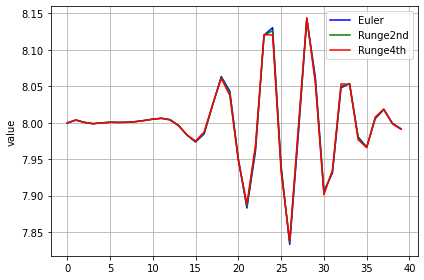

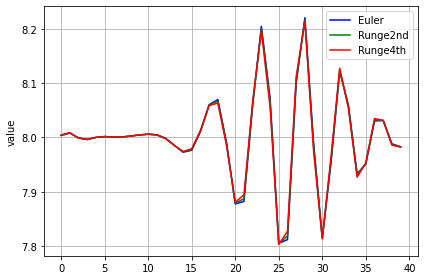

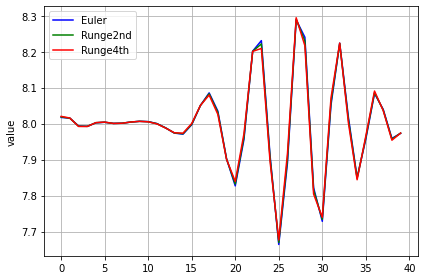

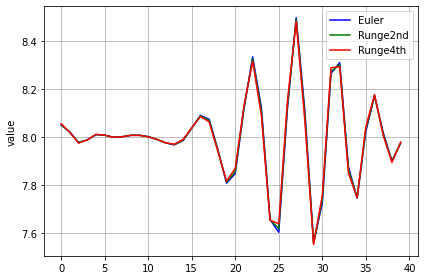

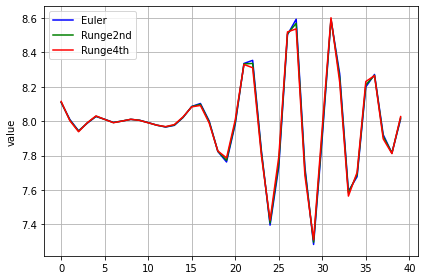

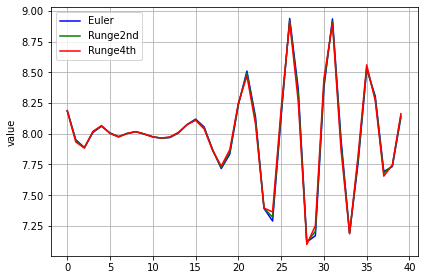

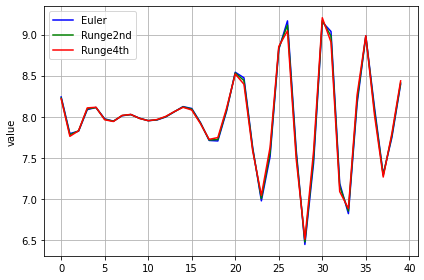

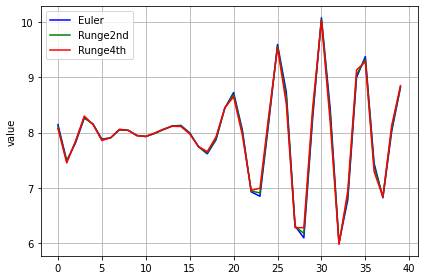

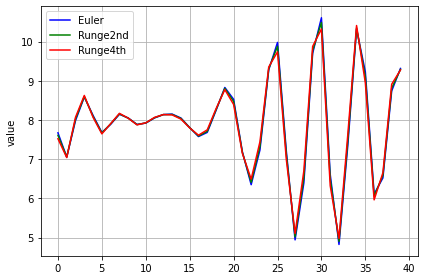

In [55]:
#3つの手法をRunge-Kutta4次のみdt = 0.05とし,
#他の二手法をdt = 0.001として比較する．
sample = 10000

X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)

tstart = 0.0
tend = sample*0.05
dt = 0.001
tpoints = np.arange(tstart, tend, dt)



Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, K, 1)


for n in range(1050):
    
    if(n % 50 == 0):
        nR4 = int(n/50)
#         print("n = " + str(n))
#         print("nR4 = " + str(nR4))
        fig, ax = plt.subplots()
        c1, c2, c3 = "blue", "green", "red"
        l1, l2, l3 = "Runge4th", "Runge2nd", "Euler"
        ax.set_ylabel('value')
        ax.grid()
        ax.plot(x, Xe[n], color=c1, label=l3)
        ax.plot(x, Xr2[n], color=c2, label=l2)
        ax.plot(x, Xr4[int(nR4)], color=c3, label=l1)
        ax.legend(loc=0)
        fig.tight_layout()


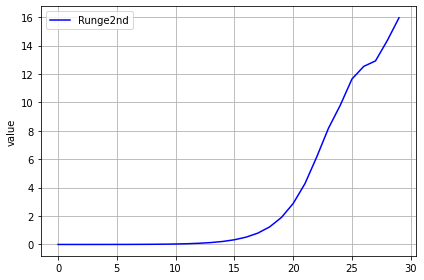

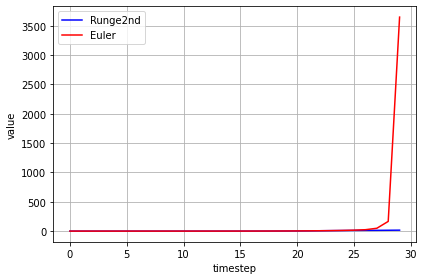

In [56]:
#3つの手法をdt = 0.05としてRMSEを出力する．
sample = 30


rmseR2005 = np.zeros(sample)
rmseE005 = np.zeros(sample)


X = np.full(K, F)
X[19] = F*1.001

Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))
delta2 = np.empty(K)

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)
Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)

x = np.arange(0, sample, 1)
for n in range(sample):
    delta2 = np.square(Xr4[n] - Xr2[n])
    rmseR2005[n] = np.sqrt(np.sum(delta2)/K)
    delta2 = np.square(Xr4[n] - Xe[n])
    rmseE005[n] = np.sqrt(np.sum(delta2)/K)
  

fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Eular"
ax.set_ylabel('value')
ax.grid()
ax.plot(x, rmseR2005, color=c1, label=l1)
# ax.plot(x, rmseE, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()

fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Euler"
ax.set_ylabel('value')
ax.set_xlabel('timestep')
ax.grid()
ax.plot(x, rmseR2005, color=c1, label=l1)
ax.plot(x, rmseE005, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()

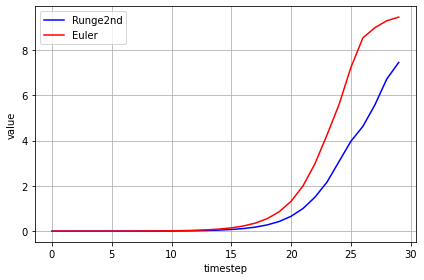

In [57]:
#3つの手法をRunge-Kutta4次のみdt = 0.05とし,
#他の二手法をdt = 0.01としてRMSEを出す．

rmseR2001 = np.zeros(30)
rmseE001 = np.zeros(30)
delta2 = np.empty(K)

M = 30
sample = 10000
delta_t = 5

X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)

tstart = 0.0
tend = sample*0.05
dt = 0.01
tpoints = np.arange(tstart, tend, dt)


Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, M, 1)


for n in range(M*delta_t):
    
    if(n % delta_t == 0):
        nR4 = int(n/5)
        delta2 = np.square(Xr4[nR4] - Xr2[n])
        rmseR2001[int(n/5)] = np.sqrt(np.sum(delta2)/K)
        delta2 = np.square(Xr4[nR4] - Xe[n])
        rmseE001[int(n/5)] = np.sqrt(np.sum(delta2)/K)
        
fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Euler"
ax.set_ylabel('value')
ax.set_xlabel('timestep')
ax.grid()
ax.plot(x, rmseR2001, color=c1, label=l1)
ax.plot(x, rmseE001, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()


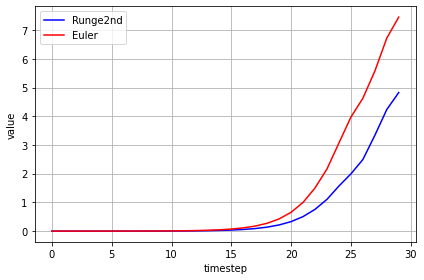

In [58]:
#3つの手法をRunge-Kutta4次のみdt = 0.05とし,
#他の二手法をdt = 0.005としてRMSEを出す．

M = 30
sample = 10000
delta_t = 10

rmseR20005 = np.zeros(M)
rmseE0005 = np.zeros(M)
delta2 = np.empty(K)



X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)

tstart = 0.0
tend = sample*0.05
dt = 0.005
tpoints = np.arange(tstart, tend, dt)


Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, M, 1)


for n in range(M*delta_t):
    
    if(n % delta_t == 0):
        nR4 = int(n/delta_t)
        delta2 = np.square(Xr4[nR4] - Xr2[n])
        rmseR20005[int(n/delta_t)] = np.sqrt(np.sum(delta2)/K)
        delta2 = np.square(Xr4[nR4] - Xe[n])
        rmseE0005[int(n/delta_t)] = np.sqrt(np.sum(delta2)/K)
        
fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Euler"
ax.set_ylabel('value')
ax.set_xlabel('timestep')
ax.grid()
ax.plot(x, rmseR20005, color=c1, label=l1)
ax.plot(x, rmseE0005, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()


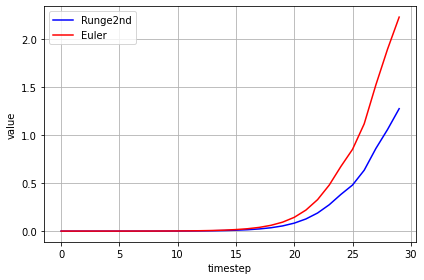

In [59]:
#3つの手法をRunge-Kutta4次のみdt = 0.05とし,
#他の二手法をdt = 0.001としてRMSEを出す．

M = 30
sample = 10000
delta_t = 50

rmseR20001 = np.zeros(M)
rmseE0001 = np.zeros(M)
delta2 = np.empty(K)



X = np.full(K, F)
X[19] = F*1.001
Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)

tstart = 0.0
tend = sample*0.05
dt = 0.001
tpoints = np.arange(tstart, tend, dt)


Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)
x = np.arange(0, M, 1)


for n in range(M*delta_t):
    
    if(n % delta_t == 0):
        nR4 = int(n/delta_t)
        delta2 = np.square(Xr4[nR4] - Xr2[n])
        rmseR20001[int(n/delta_t)] = np.sqrt(np.sum(delta2)/K)
        delta2 = np.square(Xr4[nR4] - Xe[n])
        rmseE0001[int(n/delta_t)] = np.sqrt(np.sum(delta2)/K)
        
fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Euler"
ax.set_ylabel('value')
ax.set_xlabel('timestep')
ax.grid()
ax.plot(x, rmseR20001, color=c1, label=l1)
ax.plot(x, rmseE0001, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()


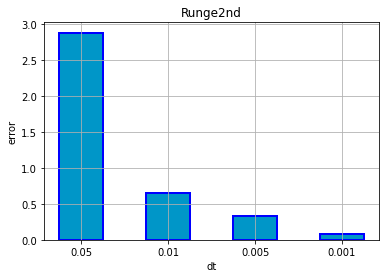

In [73]:
#t = 1(timestep = 20)のときの各RMSEをRnge2ndとEulerごとに比較

left = [1, 2, 3, 4]
hight = [rmseR2005[20], rmseR2001[20], rmseR20005[20], rmseR20001[20]]

labels = ["0.05", "0.01", "0.005", "0.001"]
plt.bar(left, height, width=0.5, color='#0096c8', edgecolor='b', linewidth=2, tick_label=labels)
plt.title("Runge2nd")
plt.xlabel("dt")
plt.ylabel("error")
plt.grid(True)

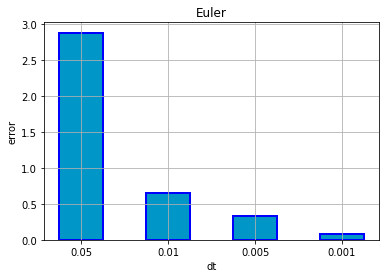

In [74]:
#t = 1(timestep = 20)のときの各RMSEをRnge2ndとEulerごとに比較

left = [1, 2, 3, 4]
hight = [rmseE005[20], rmseE001[20], rmseE0005[20], rmseE0001[20]]

labels = ["0.05", "0.01", "0.005", "0.001"]
plt.bar(left, height, width=0.5, color='#0096c8', edgecolor='b', linewidth=2, tick_label=labels)
plt.title("Euler")
plt.xlabel("dt")
plt.ylabel("error")
plt.grid(True)